# Домашня робота №7

# Перетворення випадкових величин

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

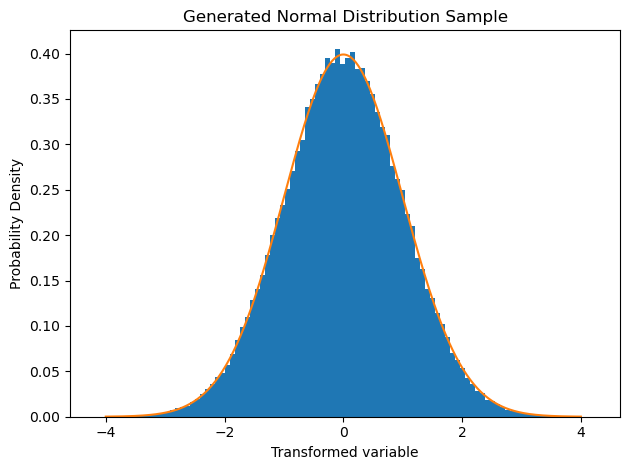

In [1]:
#місце для коду
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

sample_size = 10**5
random_values = np.random.uniform(size=sample_size)
transformed = norm().isf(1 - random_values)

fig, ax = plt.subplots()
ax.hist(transformed, bins=100, density=True)

domain = np.linspace(-4, 4, 400)
curve = norm().pdf(domain)
ax.plot(domain, curve)

ax.set_xlabel("Transformed variable")
ax.set_ylabel("Probability Density")
ax.set_title("Generated Normal Distribution Sample")
plt.tight_layout()
plt.show()



## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

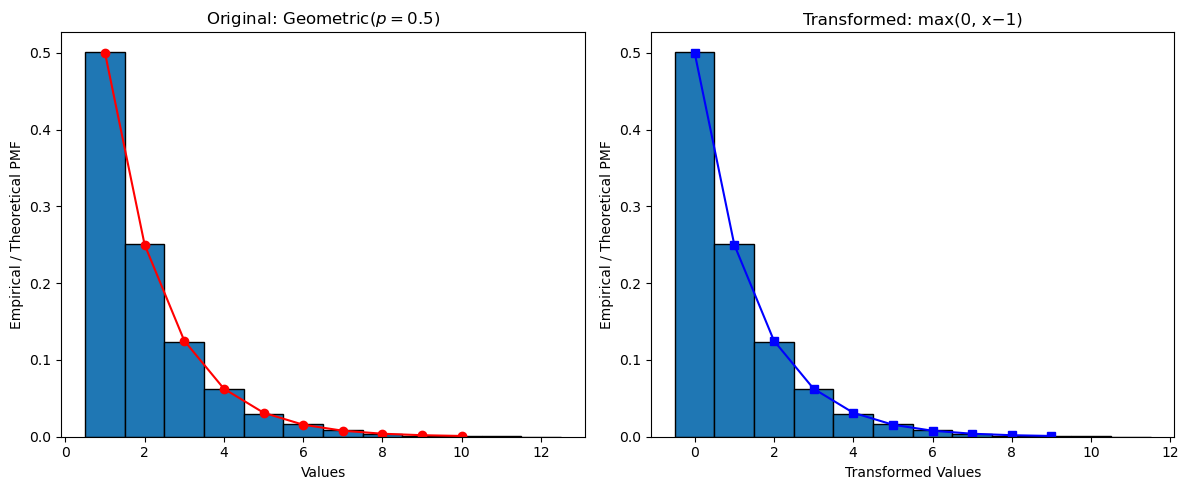

In [1]:
#місце для коду
import numpy as np
import matplotlib.pyplot as plt

trials = 10000
prob = 0.5
geom_sample = np.random.geometric(prob, size=trials)

adjusted_sample = np.where(geom_sample > 1, geom_sample - 1, 0)

domain_x = np.arange(1, 11)
pmf_geom = prob * np.power(1 - prob, domain_x - 1)

domain_y = np.arange(0, 10)
pmf_adjusted = prob * np.power(1 - prob, domain_y)

edges_x = np.arange(0.5, geom_sample.max() + 1.5)
edges_y = np.arange(-0.5, adjusted_sample.max() + 1.5)

fig, plots = plt.subplots(1, 2, figsize=(12, 5))

plots[0].hist(geom_sample, bins=edges_x, density=True, edgecolor='black')
plots[0].plot(domain_x, pmf_geom, 'ro-')
plots[0].set_title("Original: Geometric($p=0.5$)")
plots[0].set_xlabel("Values")
plots[0].set_ylabel("Empirical / Theoretical PMF")

plots[1].hist(adjusted_sample, bins=edges_y, density=True, edgecolor='black')
plots[1].plot(domain_y, pmf_adjusted, 'bs-')
plots[1].set_title("Transformed: max(0, x−1)")
plots[1].set_xlabel("Transformed Values")
plots[1].set_ylabel("Empirical / Theoretical PMF")

plt.tight_layout()
plt.show()


## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

**Текст, выделенный полужирным шрифтом**### 3.1 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

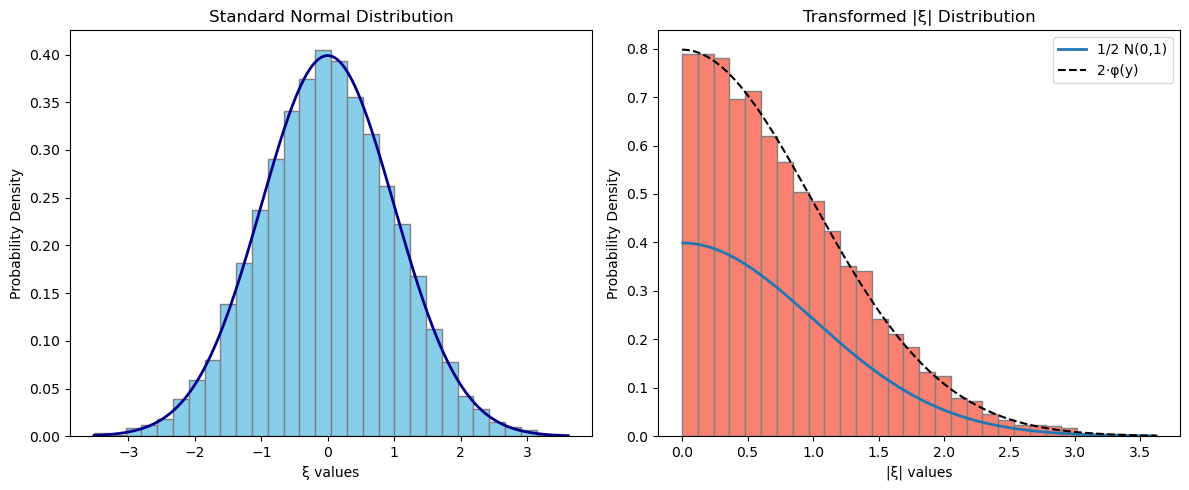

In [2]:
#місце для коду
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

size = 10_000
normal_vals = np.random.normal(loc=0.0, scale=1.0, size=size)
mod_vals = np.abs(normal_vals)

x_vals = np.linspace(normal_vals.min(), normal_vals.max(), 1000)
pdf_norm = norm(loc=0, scale=1).pdf(x_vals)

y_vals = np.linspace(0, mod_vals.max(), 1000)
pdf_mod = 2 * norm.pdf(y_vals)

fig, panels = plt.subplots(1, 2, figsize=(12, 5))

panels[0].hist(normal_vals, bins=30, density=True, color='skyblue', edgecolor='gray')
panels[0].plot(x_vals, pdf_norm, color='darkblue', linewidth=2)
panels[0].set_title("Standard Normal Distribution")
panels[0].set_xlabel("ξ values")
panels[0].set_ylabel("Probability Density")

panel_domain = x_vals[x_vals >= 0]
pdf_clip = pdf_norm[x_vals >= 0]

panels[1].hist(mod_vals, bins=30, density=True, color='salmon', edgecolor='gray')
panels[1].plot(panel_domain, pdf_clip, label='1/2 N(0,1)', linewidth=2)
panels[1].plot(y_vals, pdf_mod, linestyle='dashed', color='black', label='2·φ(y)')
panels[1].set_title("Transformed |ξ| Distribution")
panels[1].set_xlabel("|ξ| values")
panels[1].set_ylabel("Probability Density")
panels[1].legend()

plt.tight_layout()
plt.show()


## 4 Одиничний квадрат

Реалізуйте випадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

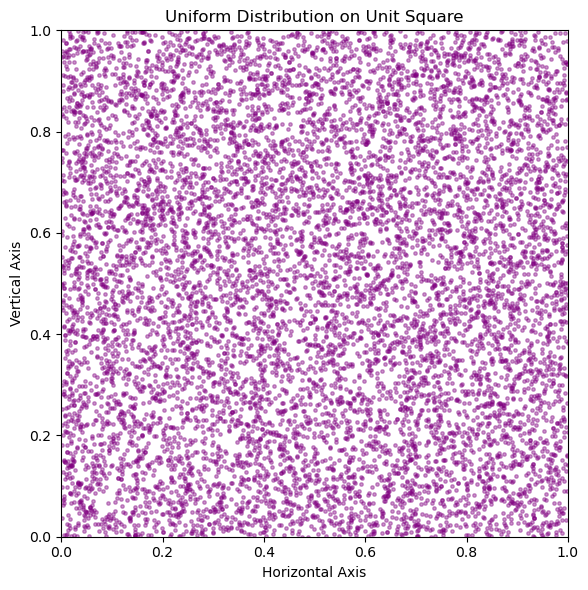

In [3]:
#місце для коду
import numpy as np
import matplotlib.pyplot as plt

points = 10_000
samples = np.random.uniform(low=0.0, high=1.0, size=(points, 2))

x_coords = samples[:, 0]
y_coords = samples[:, 1]

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x_coords, y_coords, color='purple', alpha=0.4, s=6)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("Horizontal Axis")
ax.set_ylabel("Vertical Axis")
ax.set_title("Uniform Distribution on Unit Square")
ax.set_aspect("equal")

plt.tight_layout()
plt.show()


Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

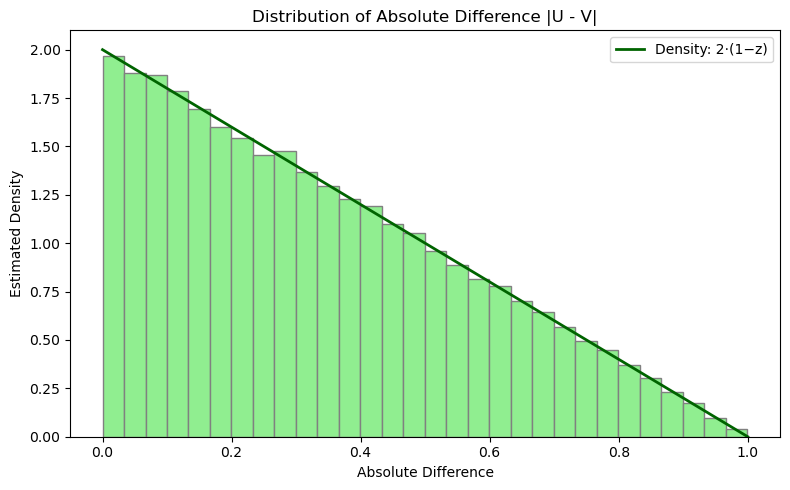

In [4]:
#місце для коду
import numpy as np
import matplotlib.pyplot as plt

num_points = 100_000
coords = np.random.uniform(0, 1, (num_points, 2))

u_vals = coords[:, 0]
v_vals = coords[:, 1]
dist_diff = np.abs(u_vals - v_vals)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(dist_diff, bins=30, density=True, color='lightgreen', edgecolor='gray')

theoretical = np.linspace(0, 1, 1000)
density_curve = 2 * (1 - theoretical)
ax.plot(theoretical, density_curve, color='darkgreen', linewidth=2, label='Density: 2·(1−z)')

ax.set_title("Distribution of Absolute Difference |U - V|")
ax.set_xlabel("Absolute Difference")
ax.set_ylabel("Estimated Density")
ax.legend()
plt.tight_layout()
plt.show()
